# Female Pregnancy Outcome

In [26]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
df = pd.read_csv(open("./datasets/ahs-wps-chhattisgarh-koriya.csv"))

df.head(5)

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3433: DtypeWarning: Columns (186,187) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,twps_id,client_twps_id,w_id,serial_no,house_no,house_hold_no,state,district,rural,stratum_code,...,FIDH,FIDx,AS,AS_Binned,IsNewRecord,RecordUpdatedCount,RecordStatus,Schedule_Id,Year,Id
0,49.0,38680.0,282.0,6,39,1,CHHATTISGARH,KORIYA,Rural,200<population<2000,...,220101100390106,3.452201e+09,NaN,Middle,NaN,NaN,NaN,3,Second Updation Round,3030181
1,NaN,NaN,NaN,2,39,3,CHHATTISGARH,KORIYA,Rural,200<population<2000,...,220101100390302,NaN,NaN,NaN,1.0,1.0,2.0,3,Second Updation Round,3030182
2,50.0,38681.0,283.0,4,40,1,CHHATTISGARH,KORIYA,Rural,200<population<2000,...,220101100400104,3.462201e+09,NaN,Lowest,NaN,NaN,NaN,3,Second Updation Round,3030190
3,NaN,NaN,NaN,2,40,3,CHHATTISGARH,KORIYA,Rural,200<population<2000,...,220101100400302,NaN,NaN,NaN,1.0,1.0,2.0,3,Second Updation Round,3030191
4,NaN,NaN,NaN,2,41,2,CHHATTISGARH,KORIYA,Rural,200<population<2000,...,220101100410202,NaN,NaN,NaN,NaN,1.0,2.0,3,Second Updation Round,3030192


## Dimensionality Reduction

In [28]:
# Selecting columns relevant to prediction
data = df.iloc[:, [12, 13, 52, 54, 16]]

# drop 
data.dropna()

,age,marital_status,type_of_delivery,check_up_with_48_hours_of_del,out_come_of_preg
0,19,Married and Gauna performed,Normal,No,Live-Birth
1,21,Married and Gauna performed,Normal,Yes,Live-Birth
2,28,Married and Gauna performed,Normal,No,Live-Birth
3,30,Married and Gauna performed,Normal,Yes,Live-Birth
4,29,Married and Gauna performed,Normal,No,Live-Birth
...,...,...,...,...,...
4434,27,Married and Gauna performed,Normal,Yes,Live-Birth
4435,25,Married and Gauna performed,Normal,No,Live-Birth
4436,27,Married and Gauna performed,Normal,Yes,Live-Birth
4437,26,Married and Gauna performed,Normal,Yes,Live-Birth


Based on the dataset, the following variables are relevant to predicting the outcome of pregnancy in a woman:

- Age (variable 13, also listed as Age in variable 14)
- Marital status (variable 14, also listed as Marital Status)
- Pregnancy number (variable 15, also listed as Pregnancy No.)
- Pregnancy outcome (variable 17, also listed as Outcome of Pregnancy)
- ANC status (variable 21, also listed as Did you receive any ANC?)
- Ultrasound status (variable 22, also listed as Did you go for ultrasound before this abortion?)
- Type of delivery (variable 53, also listed as Was the delivery normal, caesarean or assisted?)
- Check-up within 48 hours of delivery (variable 55, also listed as Did you have any check-up within 48 hours of delivery?)

It is worth noting that other variables such as abortion-related variables, previous/current birth intervals, and ANC-related variables could potentially have indirect impacts on pregnancy outcome, but the direct relevance of those variables to predicting pregnancy outcome is less clear. 

## Feature Sampling

In [29]:
# Split the data into features and target
features = data[['age', 'marital_status', 'type_of_delivery', 'check_up_with_48_hours_of_del']]
target = data['out_come_of_preg']

Two dataframes are created, `features` and `target` from the input dataset. The `features` dataframe contains columns `age`, `marital_status`, `type_of_delivery`, and `check_up_with_48_hours_of_del`, while the target dataframe contains the column `out_come_of_preg`. This separation of data allows for further analysis and modelling of the data.

## Data Encoding

In [30]:
# Preprocess the data
# Encode categorical features
features = pd.get_dummies(features, columns=['marital_status', 'type_of_delivery', 'check_up_with_48_hours_of_del'])

This aims to convert categorical variables into a numerical format that can be used as input for the machine learning algorithm. The function takes the dataframe `features` as input and a list of columns ['marital_status', 'type_of_delivery', 'check_up_with_48_hours_of_del'] that contain categorical variables to be converted.


## Feature Splitting

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Modelling

In [32]:
# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Here, a machine learning model is trained using the decision tree algorithm to classify the outcome of pregnancy based on features such as age, marital status, type of delivery, and check-up within 48 hours of delivery. The decision tree algorithm is used because it can handle both numerical and categorical data and is capable of handling non-linear relationships between features.

The dataset contains both numerical and categorical features, making it necessary to use an algorithm that can handle both. The decision tree algorithm is a good choice because it can split the data based on categorical features and use numerical features to create a hierarchy of decision rules that can classify the outcome of pregnancy.

Accuracy: 0.9898648648648649


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Classification Report:
                      precision    recall  f1-score   support

    Induced Abortion       0.00      0.00      0.00         4
          Live-Birth       1.00      1.00      1.00       864
Spontaneous Abortion       0.76      0.94      0.84        17
         Still Birth       0.00      0.00      0.00         3

            accuracy                           0.99       888
           macro avg       0.44      0.49      0.46       888
        weighted avg       0.99      0.99      0.99       888



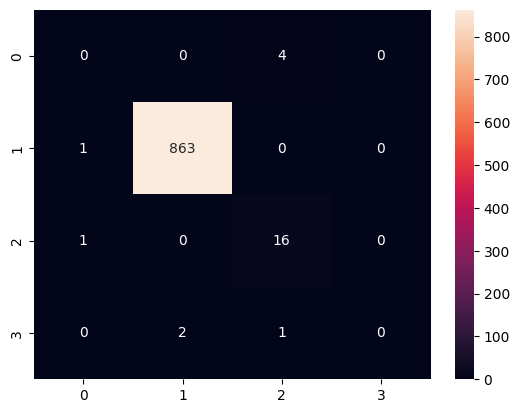

In [33]:
# Evaluate the model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='g')

# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)


This piece evaluates the performance of the Decision Tree model by using the test set. It predicts the target variable using the trained model and compares the predicted values with the actual target values. The accuracy of the model is then calculated and printed, which indicates the percentage of correctly predicted outcomes. In this case, the accuracy is 98%, which is of high level of accuracy.

To provide more detail about the model's performance, a confusion matrix is generated and plotted as a heatmap. The confusion matrix provides information about the true positives, false positives, true negatives, and false negatives, allowing for a deeper understanding of the model's predictive power. Additionally, a classification report is printed, which provides information about precision, recall, and f1-score for each class in the target variable. Overall, this code provides a thorough evaluation of the machine learning model's performance on the test set.